# Classifying MNIST with a Neural Network

In this notebook, we will classify handwritten digits from the MNIST dataset using a basic neural network.

## Steps to Follow:

1. Loading the MNIST Dataset
2. Preprocessing the Data
3. Building the Neural Network
4. Training the Model
5. Evaluating the Model
6. Visualizing the Results

## 1. Loading the MNIST Dataset

The MNIST dataset is a classic dataset in machine learning and computer vision. It consists of 70,000 images of handwritten digits (0-9), with 60,000 images for training and 10,000 images for testing. Each image is 28x28 pixels in grayscale.


11490434/11490434 [==============================] - 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


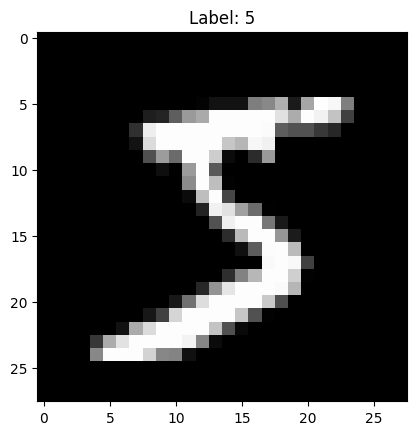

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Display the first image in the dataset
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


## 2. Preprocessing the Data

Data preprocessing is a crucial step in any machine learning project. For our neural network, we will:

1. Normalize the pixel values to be between 0 and 1.
2. One-hot encode the labels.

### 2.1 Normalizing the Pixel Values

Neural networks work better when the input values are scaled. Since the pixel values range from 0 to 255, we will divide them by 255 to bring them to the range [0, 1].

### 2.2 One-Hot Encoding the Labels

The labels are currently integers representing the digit. One-hot encoding transforms these labels into a binary matrix representation. For example, the label '2' will be converted to [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].


In [2]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display the shape of the preprocessed data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


## 3. Building the Neural Network

A neural network consists of layers of neurons. We will build a simple feedforward neural network with the following layers:

1. **Flatten Layer**: Converts the 28x28 images into a 1D array of 784 pixels.
2. **Dense Layer (Hidden Layer)**: Fully connected layer with 128 neurons and ReLU activation function.
3. **Dense Layer (Output Layer)**: Fully connected layer with 10 neurons (one for each digit) and softmax activation function.

The ReLU (Rectified Linear Unit) activation function introduces non-linearity into the network, helping it learn complex patterns. The softmax activation function is used in the output layer to provide probabilities for each class.


In [3]:
# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Training the Model

Training a neural network involves feeding the training data through the network, computing the loss, and updating the weights using backpropagation. We will train our model for 10 epochs with a batch size of 32.

- **Epoch**: One complete pass through the entire training dataset.
- **Batch Size**: The number of samples processed before updating the model parameters.


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 19s 11ms/step - loss: 0.2892 - accuracy: 0.9183 - val_loss: 0.1615 - val_accuracy: 0.9534
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1319 - accuracy: 0.9602 - val_loss: 0.1199 - val_accuracy: 0.9654
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0966 - val_accuracy: 0.9715
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0498 - accuracy: 0.9856 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0917 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.0850 - val_accurac

## 5. Evaluating the Model

After training, we evaluate the model on the test data to see how well it generalizes to new, unseen data. We will compute the accuracy and plot the confusion matrix.

### Accuracy

Accuracy is the ratio of correctly predicted instances to the total instances. It gives an overall measure of how often the model is correct.

### Confusion Matrix

A confusion matrix allows us to visualize the performance of the classification model by showing the actual vs. predicted labels.


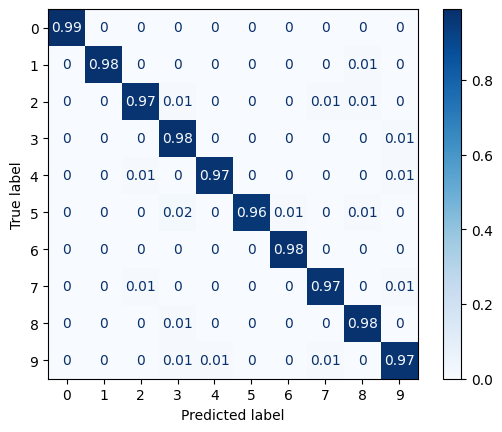

In [18]:
# Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_accuracy:.2f}")

# # Make predictions on the test data
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_true, y_pred_classes, normalize='true')
# round all numbers in confusion matrix to have 2 decimals
conf_matrix = np.round(conf_matrix, 2)
np.arange(10)

# plt.figure(figsize=(10, 8), dpi=200)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=np.arange(10))

#changes display color map to Blues
disp.plot(cmap=plt.cm.Blues)

## 6. Visualizing the Results

Visualizing the training process and the results can provide valuable insights into the model's performance. We will plot the training and validation accuracy and loss over epochs.

### Training and Validation Accuracy

The training accuracy is the accuracy on the training data, while the validation accuracy is the accuracy on the validation data (a subset of the training data not used for training).

### Training and Validation Loss

The loss measures how well the model's predictions match the true labels. Lower loss values indicate better model performance.


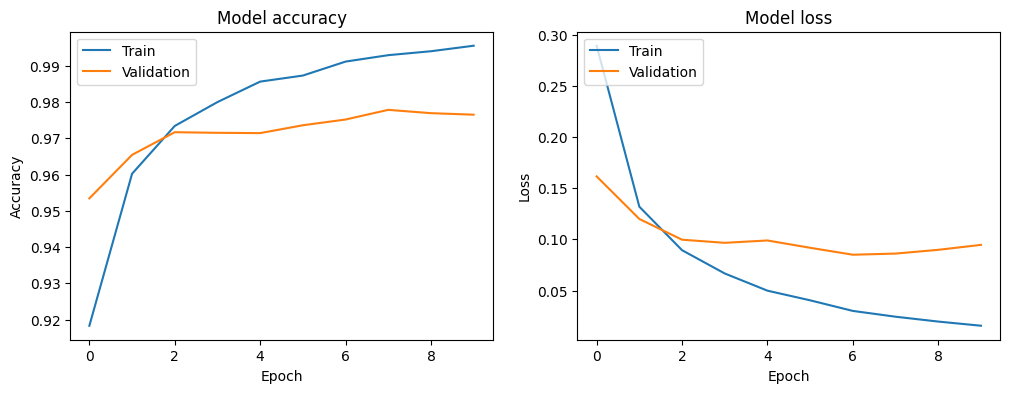

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
